In [2]:
# This is a script to perform k means clustering on any given set of image data

In [3]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import sklearn
%matplotlib inline
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
data = []
label=[]
path = "/Users/software/Desktop/cdsaiml/k_means_clustering_image_data/dog_plants_dataset/"

for image in os.listdir(path):
    
    if image != ".DS_Store":    
        img = cv2.imread(f"{path}{image}")
        
        img = cv2.resize(img,(32,32))
        img = img.astype('float32')
        print(image)
        
        if "dog" in image[:5]:
            label.append("dog")

        if "plant" in image[:5]:
            label.append("plant")

        data.append(img)

data = np.array(data)
    


data.shape

dog.png
dog5.png
plant10.png
dog6.png
4dog.png
dog7.png
plant9.png
plant8.png
plant1.png
plant3.png
plant2.png
plant6.png
plant7.png
plant5.png
plant4.png
3dog.png
1dog.png
dog9.png
dog8.png


(19, 32, 32, 3)

In [5]:
data

array([[[[247., 247., 247.],
         [247., 247., 247.],
         [247., 247., 247.],
         ...,
         [247., 247., 247.],
         [247., 247., 247.],
         [247., 247., 247.]],

        [[247., 247., 247.],
         [247., 246., 243.],
         [237., 241., 244.],
         ...,
         [247., 247., 247.],
         [247., 247., 247.],
         [247., 247., 247.]],

        [[247., 247., 247.],
         [237., 243., 246.],
         [243., 243., 238.],
         ...,
         [247., 247., 247.],
         [247., 247., 247.],
         [247., 247., 247.]],

        ...,

        [[247., 247., 247.],
         [247., 247., 247.],
         [247., 247., 247.],
         ...,
         [222., 224., 227.],
         [116., 154., 174.],
         [143., 202., 223.]],

        [[247., 247., 247.],
         [247., 247., 247.],
         [247., 247., 247.],
         ...,
         [226., 230., 233.],
         [162., 212., 226.],
         [125., 178., 190.]],

        [[247., 247., 247.],
       

In [6]:
data_label = []
for label in label:
    if label == "dog":
        data_label.append(0)
    if label == "plant":
        data_label.append(1)
data_label = np.array(data_label)

data = data/255.0

reshaped_data = data.reshape(len(data),-1)

In [7]:
data


array([[[[0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745]],

        [[0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.9647059 , 0.9529412 ],
         [0.92941177, 0.94509804, 0.95686275],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745]],

        [[0.96862745, 0.96862745, 0.96862745],
         [0.92941177, 0.9529412 , 0.9647059 ],
         [0.9529412 , 0.9529412 , 0.93333334],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745]

In [8]:
kmeans = KMeans(n_clusters = 2,random_state = 0)
clusters = kmeans.fit_predict(reshaped_data)

/Users/software/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
kmeans.cluster_centers_.shape

(2, 3072)

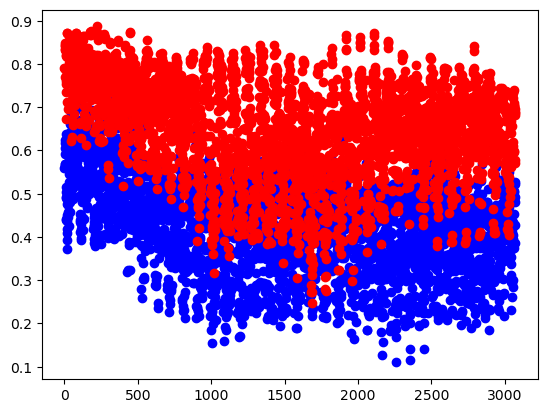

In [10]:
x_data = [i for i in range(3072)]
plt.scatter(x_data,kmeans.cluster_centers_[0],color="blue")
plt.scatter(x_data,kmeans.cluster_centers_[1],color="red")
# plt.scatter(x_data,kmeans.cluster_centers_[2],color="black")
# plt.scatter(x_data,kmeans.cluster_centers_[3],color="violet")

In [11]:
#mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [12]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
print(accuracy_score(predicted_labels,data_label))

0.7368421052631579


/Users/software/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/software/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/software/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/software/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Accuracy for k = 2:  0.6842105263157895
Accuracy for k = 3:  0.6842105263157895
Accuracy for k = 5:  0.8421052631578947
Accuracy for k = 7:  0.8421052631578947
Accuracy for k = 9:  0.8947368421052632


Text(0, 0.5, 'Sum of squared distance')

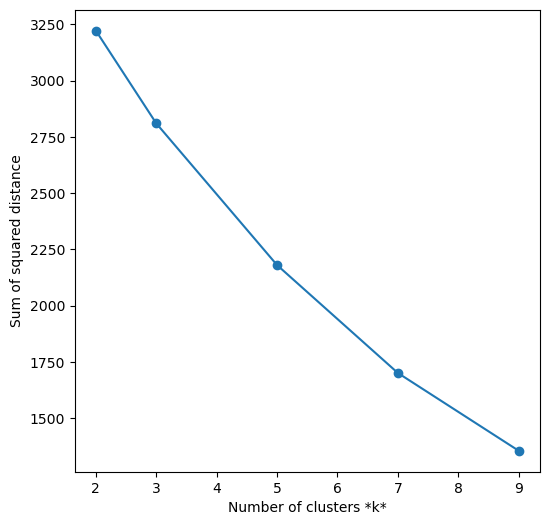

In [13]:
sse = []
list_k = [2,3,5,7,9]
for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(reshaped_data)
    sse.append(km.inertia_)
    reference_labels = get_reference_dict(clusters,data_label)
    predicted_labels = get_labels(clusters,reference_labels)
    print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,data_label))
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
""